## **<center>Exo-Planet Exploration using Machine Learning</center>**
<center><img src="https://www.philosophytalk.org/sites/default/files/styles/large_blog__900x400_/public/graham-holtshausen-fUnfEz3VLv4-unsplash.jpg" width="520" height="250" ></center>

### What are exoplanets?           
Exoplanets are planets beyond our own solar system. Thousands have been discovered in the past two decades, mostly with NASA’s Kepler Space Telescope.

These exoplanets come in a huge variety of sizes and orbits. Some are gigantic planets hugging close to their parent stars; others are icy, some rocky. NASA and other agencies are looking for a special kind of planet: one that’s the same size as Earth, orbiting a sun-like star in the habitable zone.

The habitable zone is the area around a star where it is not too hot and not too cold for liquid water to exist on the surface of surrounding planets. Imagine if Earth was where Pluto is. The Sun would be barely visible (about the size of a pea) and Earth’s ocean and much of its atmosphere would freeze.

You can see how it is been done in image below :         
<center><img src="https://www.nasa.gov/sites/default/files/images/656348main_ToV_transit_diag_full.jpg" width="520" height="250" ></center>

You can also check out my article to understand more about exoplanets at www.theaidream.com



In [105]:
# Impritng various python libraries and scikit-learn models

import os 
import math
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from numpy import random
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from prettytable import PrettyTable

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score,roc_curve,auc, f1_score, roc_auc_score,confusion_matrix, accuracy_score, classification_report

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pylab import rcParams
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [106]:
train_df = pd.read_csv('/content/drive/MyDrive/exoTrain.csv')
test_df = pd.read_csv('/content/drive/MyDrive/exoTest.csv')
train_df.head(5)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [107]:
# Replacing 1 --> 0 (Non-exoplanets), and  2 --> 1 (Exo-planets)
categ = {2: 1,1: 0}
train_df.LABEL = [categ[item] for item in train_df.LABEL]
test_df.LABEL = [categ[item] for item in test_df.LABEL]

### Plotting some feature graphs of Non-Exoplanets

In [108]:
train_exo_y=train_df[train_df['LABEL'] >1 ]
train_exo_n=train_df[train_df['LABEL'] < 2]
x_train_res=train_exo_n.iloc[:,1:].T
y_train_res=train_exo_y.iloc[:,1:].T
x_train_res.head(1)
train_df['LABEL'].value_counts()


print(f'Labbel for planet 37 :  {train_df.LABEL[37]}')
print(f'Labbel for planet 5086 :  {train_df.LABEL[5086]}')
print(f'Labbel for planet 3000 :  {train_df.LABEL[3000]}')
print(f'Labbel for planet 3001 :  {train_df.LABEL[3001]}')

fig = make_subplots(rows=4, cols=1,subplot_titles=("Flux variation of star 37", "Flux variation of star 5086", 
                                                   "Flux variation of star 3000", "Flux variation of star 3001"))
fig.add_trace(
    go.Scatter(y=x_train_res[37], x=y_train_res.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[5086], x=y_train_res.index),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[3000], x=y_train_res.index),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[3001], x=y_train_res.index),
    row=4, col=1
)
fig.update_layout(height=1500, width=1200, title_text="Non Exoplanets Star examples",showlegend=False)
fig.show()

Labbel for planet 37 :  0
Labbel for planet 5086 :  0
Labbel for planet 3000 :  0
Labbel for planet 3001 :  0


### Plotting some feature graphs of Exoplanets

In [109]:
print(f'Labbel for planet 0 :  {train_df.LABEL[0]}')
print(f'Labbel for planet 1 :  {train_df.LABEL[1]}')
print(f'Labbel for planet 35 :  {train_df.LABEL[35]}')
print(f'Labbel for planet 36 :  {train_df.LABEL[36]}')
fig = make_subplots(rows=4, cols=1,subplot_titles=("Flux variation of star 0", "Flux variation of star 1", 
                                                   "Flux variation of star 35", "Flux variation of star 36"))
fig.add_trace(
    go.Scatter(y=x_train_res[0], x=y_train_res.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[1], x=y_train_res.index),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[35], x=y_train_res.index),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(y=x_train_res[36], x=y_train_res.index),
    row=4, col=1
)
fig.update_layout(height=1500, width=1200, title_text="Exoplanets Star examples",showlegend=False)
fig.show()

Labbel for planet 0 :  1
Labbel for planet 1 :  1
Labbel for planet 35 :  1
Labbel for planet 36 :  1


<Figure size 720x432 with 0 Axes>

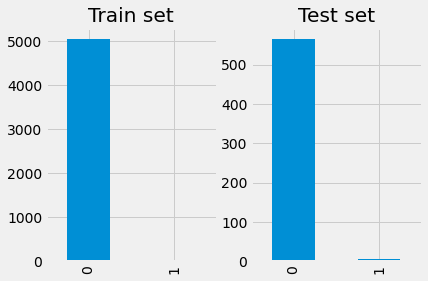

In [110]:
figure(figsize=(10, 6))
fig, axes = plt.subplots(nrows=1, ncols=2)
ax1 = train_df['LABEL'].value_counts().plot(ax=axes[0],kind='bar')
ax2 = test_df['LABEL'].value_counts().plot(ax=axes[1],kind='bar')
ax1.title.set_text('Train set')
ax2.title.set_text('Test set')
plt.show()

We can see that we have a highly imbalanced dataset consisting of imbalance between exoplanets nad non-planets label classes. 

In [111]:
x_train = train_df.drop(["LABEL"],axis=1)
y_train = train_df["LABEL"]   
x_test = test_df.drop(["LABEL"],axis=1)
y_test = test_df["LABEL"]

#### Visualisation of different key characteristics of training dataset

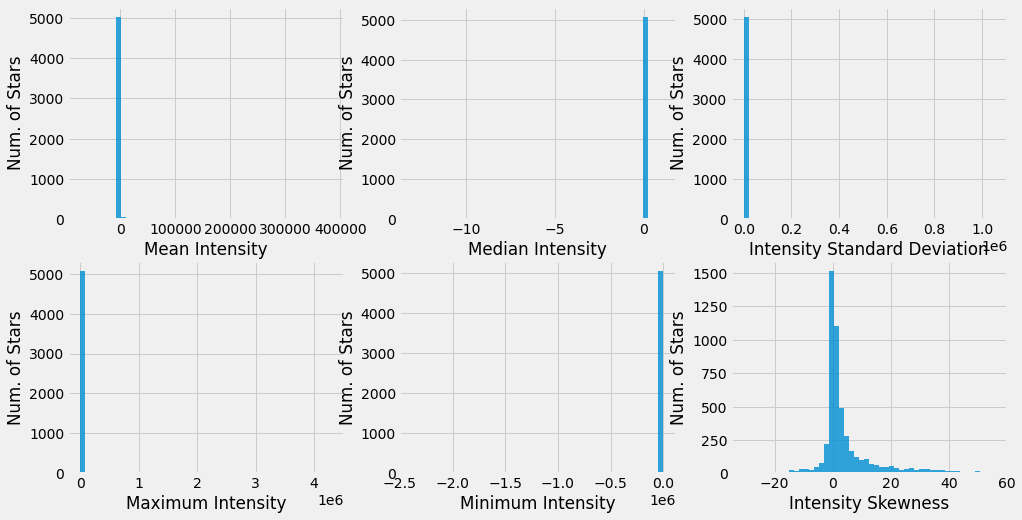

In [112]:
def stats_plots(df):
    means = df.mean(axis=1)
    medians = df.median(axis=1)
    std = df.std(axis=1)
    maxval = df.max(axis=1)
    minval = df.min(axis=1)
    skew = df.skew(axis=1)
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(231)
    ax.hist(means,alpha=0.8,bins=50)
    ax.set_xlabel('Mean Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(232)
    ax.hist(medians,alpha=0.8,bins=50)
    ax.set_xlabel('Median Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(233)
    ax.hist(std,alpha=0.8,bins=50)
    ax.set_xlabel('Intensity Standard Deviation')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(234)
    ax.hist(maxval,alpha=0.8,bins=50)
    ax.set_xlabel('Maximum Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(235)
    ax.hist(minval,alpha=0.8,bins=50)
    ax.set_xlabel('Minimum Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(236)
    ax.hist(skew,alpha=0.8,bins=50)
    ax.set_xlabel('Intensity Skewness')
    ax.set_ylabel('Num. of Stars')

stats_plots(x_train)
plt.show()

#### Plotting features data of exoplanets and non-planets, to compare visually

Red : Exoplanets
Blue : Non-Exoplanets



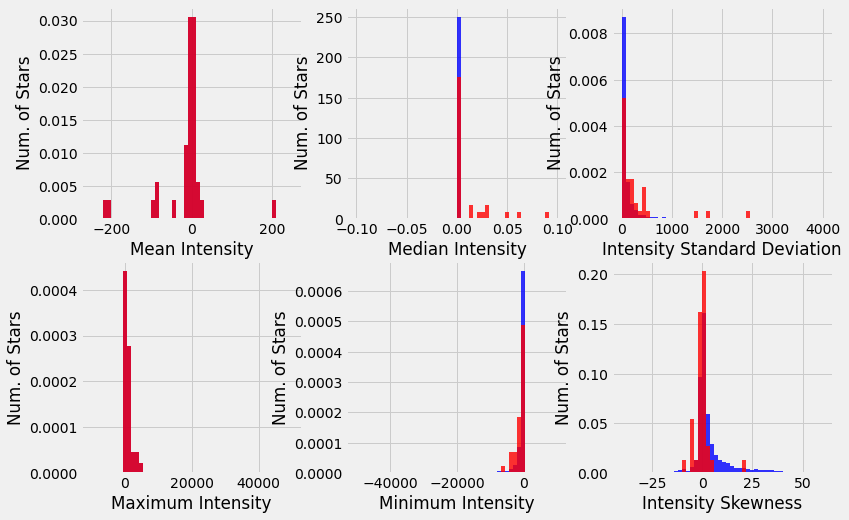

In [113]:
def stats_plots_label(df):
    means0 = df[df['LABEL']==0].mean(axis=1)
    medians0 =df[df['LABEL']==0].median(axis=1)
    std0 = df[df['LABEL']==0].std(axis=1)
    maxval0 =  df[df['LABEL']==0].max(axis=1)
    minval0 =  df[df['LABEL']==0].min(axis=1)
    skew0 =  df[df['LABEL']==0].skew(axis=1)
    means1 =  df[df['LABEL']==1].mean(axis=1)
    medians1 =  df[df['LABEL']==1].median(axis=1)
    std1 =  df[df['LABEL']==1].std(axis=1)
    maxval1 =  df[df['LABEL']==1].max(axis=1)
    minval1 =  df[df['LABEL']==1].min(axis=1)
    skew1 =  df[df['LABEL']==1].skew(axis=1)
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(231)
    ax.hist(means1,alpha=0.8,bins=50,color='b',density=True,range=(-250,250))
    ax.hist(means1,alpha=0.8,bins=50,color='r',density=True,range=(-250,250))
    ax.get_legend()
    ax.set_xlabel('Mean Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(232)
    ax.hist(medians0,alpha=0.8,bins=50,color='b',density=True,range=(-0.1,0.1))
    ax.hist(medians1,alpha=0.8,bins=50,color='r',density=True,range=(-0.1,0.1))
    ax.get_legend()

    ax.set_xlabel('Median Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(233)    
    ax.hist(std0,alpha=0.8,bins=50,density=True,color='b',range=(0,4000))
    ax.hist(std1,alpha=0.8,bins=50,density=True,color='r',range=(0,4000))
    ax.get_legend()

    ax.set_xlabel('Intensity Standard Deviation')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(234)
    ax.hist(maxval1,alpha=0.8,bins=50,density=True,color='b',range=(-10000,50000))
    ax.hist(maxval1,alpha=0.8,bins=50,density=True,color='r',range=(-10000,50000))
    ax.get_legend()

    ax.set_xlabel('Maximum Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(235)
    ax.hist(minval0,alpha=0.8,bins=50,density=True,color='b',range=(-50000,10000))
    ax.hist(minval1,alpha=0.8,bins=50,density=True,color='r',range=(-50000,10000))
    ax.get_legend()

    ax.set_xlabel('Minimum Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(236)
    ax.hist(skew0,alpha=0.8,bins=50,density=True,color='b',range=(-40,60))
    ax.hist(skew1,alpha=0.8,bins=50,density=True,color='r',range=(-40,60)) 
    ax.get_legend()

    ax.set_xlabel('Intensity Skewness')
    ax.set_ylabel('Num. of Stars')

    print('Red : Exoplanets')
    print('Blue : Non-Exoplanets\n')

stats_plots_label(train_df)
plt.show()

#### Class balancing using SMOTE( )
- As we hve imbalanced dataset as seen earlier we need to balance using oversampling technique like SMOTE()       
- SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.        
- It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

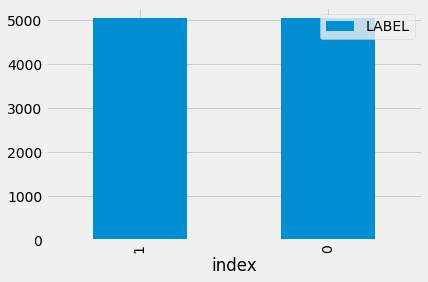

In [114]:
model = SMOTE()
x_train_res,y_train_res = model.fit_resample(train_df.drop('LABEL',axis=1), train_df['LABEL'])
y_train_res = y_train_res.astype('int')

y_train_res.value_counts().reset_index().plot(kind='bar', x='index', y='LABEL')

x_train_res, x_test, y_train_res, y_test = train_test_split(x_train_res, y_train_res, test_size=0.33, random_state=42)

In [115]:
y_train_res.value_counts()

1    3417
0    3350
Name: LABEL, dtype: int64

In [116]:
y_test.value_counts()

0    1700
1    1633
Name: LABEL, dtype: int64

Now the label classes looks fairly balanced and training would be favourable to do now.

In [117]:
x_train_res.shape, x_test.shape, y_train_res.shape, y_test.shape

((6767, 3197), (3333, 3197), (6767,), (3333,))

In [118]:
x_train_res = normalized = normalize(x_train_res)
x_test = normalize(x_test)

*NOTE :*
- Below **Optional** code is used to reduce dimenionality problems using **PCA**, and the results below are obtained **excluding this optional code**.         
- I performed using both the pipeline option and I found no advantage using PCA, moreoever it decreased my model efficiency.         
- For different or other use cases we can include this and make use of the advantage of dimenionality reduction.             

*You can try including it and further increase model accuracy.*

In [119]:
# Using gausssian fitering(Optional)

# x_train_res = filtered = ndimage.filters.gaussian_filter(x_train_res, sigma=10)
# x_test = ndimage.filters.gaussian_filter(x_test, sigma=10)

In [120]:
#Feature scaling (Optional)

# std_scaler = StandardScaler()
# x_train_res = scaled = std_scaler.fit_transform(x_train_res)
# x_test = std_scaler.fit_transform(x_test)

In [121]:
#Dimentioanlity reduction (Optional)

# from sklearn.decomposition import PCA
# pca = PCA() 
# x_train_res = pca.fit_transform(x_train_res)
# x_test = pca.transform(x_test)
# total=sum(pca.explained_variance_)
# k=0
# current_variance=0
# while current_variance/total < 0.90:
#     current_variance += pca.explained_variance_[k]
#     k=k+1

In [122]:
#Apply PCA with n_componenets (Optional)

# pca = PCA(n_components=151)
# x_train_res = pca.fit_transform(x_train_res)
# x_test = pca.transform(x_test)
# plt.figure()
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Variance (%)') #for each component
# plt.title('Exoplanet Dataset Explained Variance')
# plt.show()

### Training of various machine learning algortihms
We will perform training using models like : 
- Support Vector Machines
- Logistic Regression
- K-Neighbors Classifier
- Decision Tree Classifier
- Random Forest Classifier
- XGB Classifier

### *1. Support Vector Machines*

Validation accuracy of SVM is 0.9996999699969997

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1700
           1       1.00      1.00      1.00      1633

    accuracy                           1.00      3333
   macro avg       1.00      1.00      1.00      3333
weighted avg       1.00      1.00      1.00      3333



Text(0.5, 1.0, 'CONFUSION MATRIX')

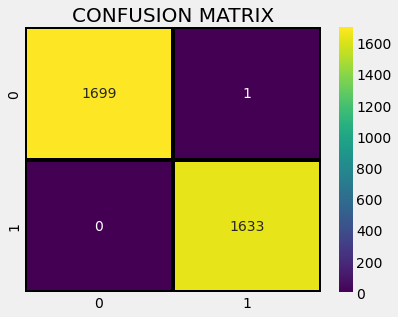

In [123]:

SVM_model=SVC()

SVM_model.fit(x_train_res,y_train_res)
prediction=SVM_model.predict(x_test)

print('Validation accuracy of SVM is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

### *2. Logistic Regression*

Validation accuracy of Logistic Regression is 0.984998499849985

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      1700
           1       0.97      1.00      0.98      1633

    accuracy                           0.98      3333
   macro avg       0.99      0.99      0.98      3333
weighted avg       0.99      0.98      0.98      3333



Text(0.5, 1.0, 'CONFUSION MATRIX')

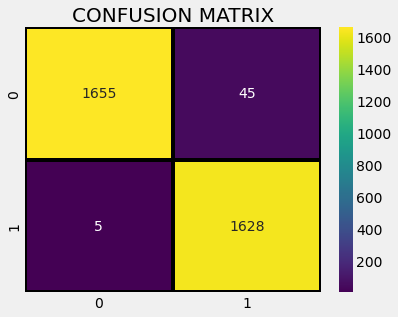

In [124]:
#Logistic Regression
lr_model = LogisticRegression()

lr_model.fit(x_train_res,y_train_res)

prediction=lr_model.predict(x_test)

print('Validation accuracy of Logistic Regression is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

### *3. Decision Tree Classifier*

Validation accuracy of Decision Tree is 0.9336933693369337

Classification report :
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      1700
           1       0.91      0.96      0.93      1633

    accuracy                           0.93      3333
   macro avg       0.93      0.93      0.93      3333
weighted avg       0.93      0.93      0.93      3333



Text(0.5, 1.0, 'CONFUSION MATRIX')

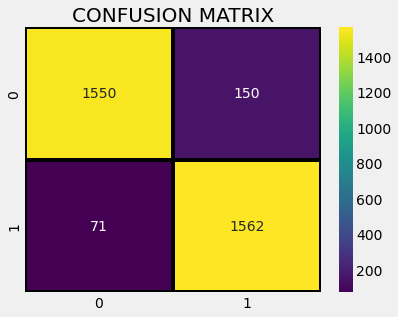

In [125]:
#Decision Tree
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(x_train_res,y_train_res)

prediction=ds_model.predict(x_test)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

### *4. K-Nearst Neighbors Classifier*

Validation accuracy of KNN is 0.9813981398139814

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1700
           1       0.96      1.00      0.98      1633

    accuracy                           0.98      3333
   macro avg       0.98      0.98      0.98      3333
weighted avg       0.98      0.98      0.98      3333



Text(0.5, 1.0, 'CONFUSION MATRIX')

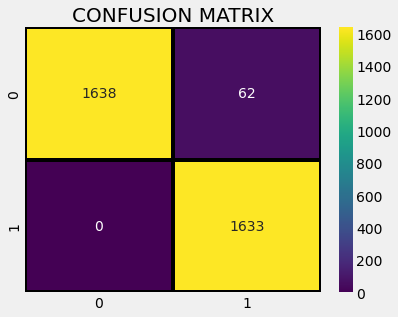

In [126]:
knn_model = KNeighborsClassifier()

knn_model.fit(x_train_res,y_train_res)

prediction=knn_model.predict(x_test)

print('Validation accuracy of KNN is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

### *5. Random Forest Classifier*

Validation accuracy of KNN is 1.0

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1700
           1       1.00      1.00      1.00      1633

    accuracy                           1.00      3333
   macro avg       1.00      1.00      1.00      3333
weighted avg       1.00      1.00      1.00      3333



Text(0.5, 1.0, 'CONFUSION MATRIX')

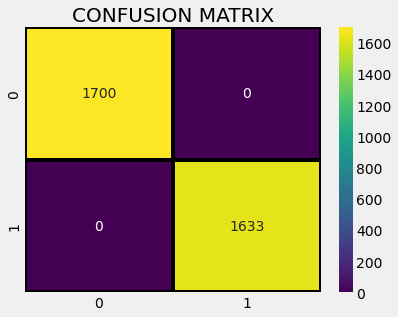

In [127]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train_res,y_train_res)

prediction=rf_classifier.predict(x_test)

print('Validation accuracy of KNN is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

Let's plot features importance for random dorest classifier as it is most accurate.

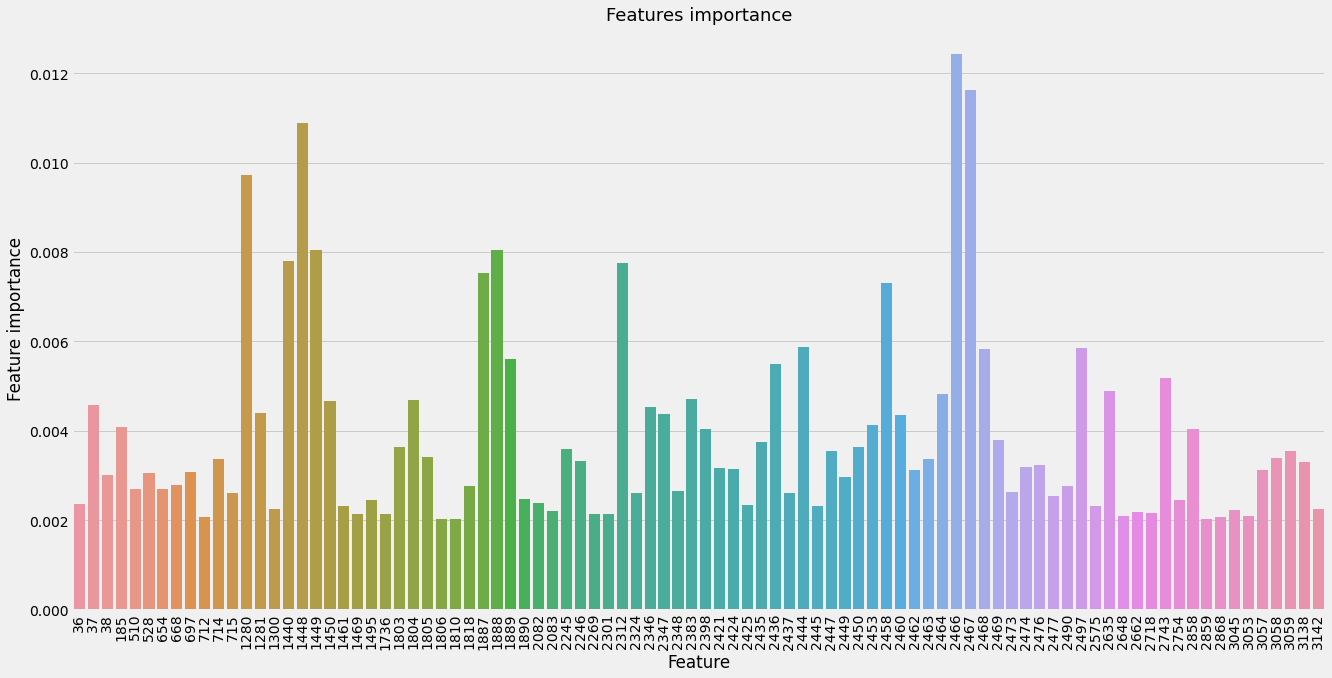

In [128]:
#Display feature importance   

df1 = pd.DataFrame.from_records(x_train_res)     
tmp = pd.DataFrame({'Feature': df1.columns, 'Feature importance': rf_classifier.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
tmp = tmp[:90]
plt.figure(figsize = (20,10))
plt.title('Features importance',fontsize=18)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- We can see some features have more weightage, and have contributed largely to predit the class correctly.             
- You can reduce dimensionality by *dropping feature columns having least or negative impact on predicting the classes*.              
- I had tried doing the same and considered top **300 features**, which gave almost the same accuracy, precision and recall numbers. So it is wise to save computional resources we can use this method to reduce dimensions/features.

### *6. XGB Classifier*

Validation accuracy of Decision Tree is 0.9945994599459946

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1700
           1       0.99      1.00      0.99      1633

    accuracy                           0.99      3333
   macro avg       0.99      0.99      0.99      3333
weighted avg       0.99      0.99      0.99      3333



Text(0.5, 1.0, 'CONFUSION MATRIX')

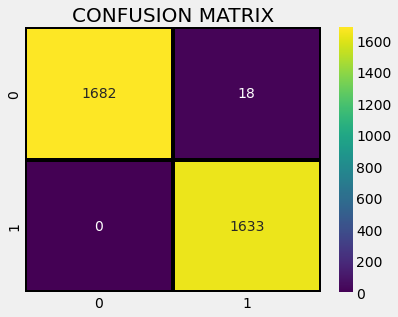

In [129]:
tuned_xgb_classifier = XGBClassifier(min_child_weight = 5,
                                     max_depth = 3,
                                     learning_rate = 0.05,
                                     gamma = 0.3,
                                     colsample_bytree = 0.3)
tuned_xgb_classifier.fit(x_train_res,y_train_res)

prediction=tuned_xgb_classifier.predict(x_test)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

### *Conclusion*

In [130]:
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Machine learning Algorithm", "Validation accuracy", "Total samples predicted incorrectly"])
 
# Add rows
myTable.add_row(["Support Vector Machines", "0.9996", "1"])
myTable.add_row(["Logistic Regression", "0.9831", "56"])
myTable.add_row(["K-Neighbors Classifier", "0.9804", "65"])
myTable.add_row(["Decision Tree Classifier", "0.9210", "263"])
myTable.add_row(["Random Forest Classifier", "0.9999", "0"])
myTable.add_row(["XGB Classifier", "0.9966", "11"])
print('Comparision between different algorithm\n')
print(myTable)

Comparision between different algorithm

+----------------------------+---------------------+-------------------------------------+
| Machine learning Algorithm | Validation accuracy | Total samples predicted incorrectly |
+----------------------------+---------------------+-------------------------------------+
|  Support Vector Machines   |        0.9996       |                  1                  |
|    Logistic Regression     |        0.9831       |                  56                 |
|   K-Neighbors Classifier   |        0.9804       |                  65                 |
|  Decision Tree Classifier  |        0.9210       |                 263                 |
|  Random Forest Classifier  |        0.9999       |                  0                  |
|       XGB Classifier       |        0.9966       |                  11                 |
+----------------------------+---------------------+-------------------------------------+


We can see that Random Forest Classifier performs best for this use case with accuracy almost to **100%**.   
#### NOTE :        
- *I also tried using deep learning model architecture using Convolutional* *networks, but it also was giving same results, or maybe worse then this* *classic machine learning models.*
- *Therefore it is wise not to use complicated CNNs architecture and waste resources if it is not doing any good*        

SMOTE also increase accuracy by creating balanced dataset.